In [2]:
!python.exe -m pip install --upgrade pip
!pip install tensorflow
!pip install scikit-learn
!pip install keras
!pip install seaborn
!pip install ann_visualizer

In [3]:
import os
ROOT_DIR = os.getcwd()
print("Current working directory:", ROOT_DIR)


Current working directory: c:\Users\vinit\Desktop\Neuromorphic_ASIC_Design


In [4]:
import tensorflow as tf

if tf.config.list_physical_devices('GPU'):
    print("GPU is available!")
else:
    print("GPU is not available.")



GPU is not available.


In [6]:
import os
import numpy as np
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense
# from ann_visualizer.visualize import ann_viz

In [7]:
import tensorflow as tf
print("GPU Available:", tf.config.list_physical_devices('GPU'))
os.environ["CUDA_VISIBLE_DEVICES"] = "0"

GPU Available: []


In [8]:
# def path_to_csv(file_number):
#     filenumber = str(file_number) + '.csv'
#     # for dirname, _, filenames in os.walk(''):
#     for filename in filenames:
#         if (filename == filenumber):
#             file_path = os.path.join(dirname, filename)
#             # print(os.path.join(dirname, file_number))
#             return file_path

In [9]:
path = 'database\\MIT-BIH Arrhythmia Database copy.csv'

In [10]:
file_path  = os.path.join(ROOT_DIR, path)

In [11]:
file_path

'c:\\Users\\vinit\\Desktop\\Neuromorphic_ASIC_Design\\database\\MIT-BIH Arrhythmia Database copy.csv'

In [12]:
# fix random seed for reproducibility
# np.random.seed(7)

In [13]:
# load MIT-BIH dataset
dataset = pd.read_csv(file_path)

In [14]:
veb_rows = dataset[dataset['type'] == 'VEB'].copy()
sveb_rows = dataset[dataset['type'] == 'SVEB'].copy()
f_rows = dataset[dataset['type'] == 'F'].copy()
q_rows = dataset[dataset['type'] == 'Q'].copy()

# Append duplicated rows to the original DataFrame
dataset = pd.concat([dataset] + [veb_rows]*12 + [sveb_rows]*29 + [f_rows]*110 + [q_rows]*6200, ignore_index=True)

# Shuffle the DataFrame to mix the duplicated rows with the original ones
dataset = dataset.sample(frac=1).reset_index(drop=True)

In [15]:
dataset

,record,type,0_pre-RR,0_post-RR,0_pPeak,0_tPeak,0_rPeak,0_sPeak,0_qPeak,0_qrs_interval,...,1_qPeak,1_qrs_interval,1_pq_interval,1_qt_interval,1_st_interval,1_qrs_morph0,1_qrs_morph1,1_qrs_morph2,1_qrs_morph3,1_qrs_morph4
0,213,N,234,200.0,-0.050704,-0.652783,1.902075,-1.532469,-0.092052,24,...,-0.951583,4,7,28,17,-0.951583,-0.951583,-1.183476,-1.375470,-1.510319
1,118,N,305,304.0,-0.120018,0.266827,0.829789,-1.043951,-0.177685,29,...,-1.168852,3,16,29,10,-1.168852,-1.168852,-1.154633,-1.154633,-1.076117
2,214,VEB,167,403.0,0.511457,-0.181012,1.432893,-0.867830,0.143269,30,...,-0.734734,59,81,145,5,-0.734734,-0.641738,-0.486980,-0.279111,0.206581
3,109,N,255,254.0,-0.025101,0.413433,1.277143,-1.285192,-0.048644,39,...,-0.701235,5,12,54,37,-0.701235,-0.802959,-0.889880,-0.954701,-0.991826
4,205,VEB,177,338.0,0.249532,0.983873,-0.618746,-1.572790,-0.618746,6,...,-0.085921,2,13,27,12,-0.085921,-0.085921,-0.085921,-0.078416,-0.078416
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
446713,101,Q,386,343.0,-0.189489,1.359877,-0.224210,-0.378801,-0.224210,5,...,0.143144,26,8,133,99,0.143144,0.189707,0.157048,0.050664,-0.201991
446714,228,N,340,369.0,0.124323,-0.065871,0.819640,-0.204007,-0.144973,29,...,-2.150519,5,15,30,10,-2.150519,-2.131999,-2.043387,-1.881657,-1.643576
446715,124,N,404,385.0,0.217750,0.341506,1.346650,-1.052402,0.125284,27,...,-0.482820,25,8,44,11,-0.482820,0.170836,0.701812,0.185709,-0.243337
446716,213,VEB,197,200.0,-0.060810,1.156500,1.961535,-2.456344,-0.437559,45,...,-2.834740,14,13,46,19,-2.834740,-2.774162,-2.460658,-2.112074,-1.803065


In [16]:
# split into input (X) and output (dataset) variables
# X = dataset.iloc[:,2:4,]
# X1 = dataset.iloc[:, 2:18]
X = pd.concat([
    dataset.iloc[:, 2:4],
    dataset.iloc[:, 9:13]
], axis=1)


Y = dataset[['type']]

In [17]:
X

,0_pre-RR,0_post-RR,0_qrs_interval,0_pq_interval,0_qt_interval,0_st_interval
0,234,200.0,24,7,39,8
1,305,304.0,29,7,58,22
2,167,403.0,30,40,83,13
3,255,254.0,39,6,137,92
4,177,338.0,6,6,50,38
...,...,...,...,...,...,...
446713,386,343.0,5,2,20,13
446714,340,369.0,29,18,54,7
446715,404,385.0,27,5,136,104
446716,197,200.0,45,17,135,73


In [18]:
dataset

,record,type,0_pre-RR,0_post-RR,0_pPeak,0_tPeak,0_rPeak,0_sPeak,0_qPeak,0_qrs_interval,...,1_qPeak,1_qrs_interval,1_pq_interval,1_qt_interval,1_st_interval,1_qrs_morph0,1_qrs_morph1,1_qrs_morph2,1_qrs_morph3,1_qrs_morph4
0,213,N,234,200.0,-0.050704,-0.652783,1.902075,-1.532469,-0.092052,24,...,-0.951583,4,7,28,17,-0.951583,-0.951583,-1.183476,-1.375470,-1.510319
1,118,N,305,304.0,-0.120018,0.266827,0.829789,-1.043951,-0.177685,29,...,-1.168852,3,16,29,10,-1.168852,-1.168852,-1.154633,-1.154633,-1.076117
2,214,VEB,167,403.0,0.511457,-0.181012,1.432893,-0.867830,0.143269,30,...,-0.734734,59,81,145,5,-0.734734,-0.641738,-0.486980,-0.279111,0.206581
3,109,N,255,254.0,-0.025101,0.413433,1.277143,-1.285192,-0.048644,39,...,-0.701235,5,12,54,37,-0.701235,-0.802959,-0.889880,-0.954701,-0.991826
4,205,VEB,177,338.0,0.249532,0.983873,-0.618746,-1.572790,-0.618746,6,...,-0.085921,2,13,27,12,-0.085921,-0.085921,-0.085921,-0.078416,-0.078416
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
446713,101,Q,386,343.0,-0.189489,1.359877,-0.224210,-0.378801,-0.224210,5,...,0.143144,26,8,133,99,0.143144,0.189707,0.157048,0.050664,-0.201991
446714,228,N,340,369.0,0.124323,-0.065871,0.819640,-0.204007,-0.144973,29,...,-2.150519,5,15,30,10,-2.150519,-2.131999,-2.043387,-1.881657,-1.643576
446715,124,N,404,385.0,0.217750,0.341506,1.346650,-1.052402,0.125284,27,...,-0.482820,25,8,44,11,-0.482820,0.170836,0.701812,0.185709,-0.243337
446716,213,VEB,197,200.0,-0.060810,1.156500,1.961535,-2.456344,-0.437559,45,...,-2.834740,14,13,46,19,-2.834740,-2.774162,-2.460658,-2.112074,-1.803065


In [19]:
# # normalize data
# from sklearn.preprocessing import MinMaxScaler

# scaler = MinMaxScaler()
# X_train_scaled = scaler.fit_transform(X)

# dataset_normalized = pd.read_csv(scaler.fit_transform(path), columns=path.columns)

In [20]:

# min_max_scaler = preprocessing.MinMaxScaler()
# X_train_scaled = min_max_scaler.fit_transform(X_train)
# X_test_scaled = min_max_scaler.transform(X_test)

# print(scaler.scale_)

# X_train_scaled

In [21]:
#Class Renaming
Y.replace(['N','VEB', 'SVEB', 'F', 'Q'], [0,1,2,3,4], inplace=True)

C:\Users\vinit\AppData\Local\Temp\ipykernel_13844\1281512207.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  Y.replace(['N','VEB', 'SVEB', 'F', 'Q'], [0,1,2,3,4], inplace=True)
C:\Users\vinit\AppData\Local\Temp\ipykernel_13844\1281512207.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Y.replace(['N','VEB', 'SVEB', 'F', 'Q'], [0,1,2,3,4], inplace=True)


In [22]:
Y

,type
0,0
1,0
2,1
3,0
4,1
...,...
446713,4
446714,0
446715,0
446716,1


In [23]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X , Y, test_size=0.2, random_state=42)

In [24]:
X_train

,0_pre-RR,0_post-RR,0_qrs_interval,0_pq_interval,0_qt_interval,0_st_interval
30237,263,264.0,22,13,36,1
197358,262,269.0,13,4,18,1
70421,169,415.0,63,30,101,8
102152,24,357.0,40,16,69,13
234879,230,239.0,37,20,63,6
...,...,...,...,...,...,...
259178,350,357.0,21,13,44,10
365838,177,360.0,58,9,72,5
131932,206,201.0,28,4,104,72
146867,200,206.0,43,16,141,82


In [25]:
y_train

,type
30237,2
197358,2
70421,1
102152,4
234879,3
...,...
259178,0
365838,1
131932,3
146867,3


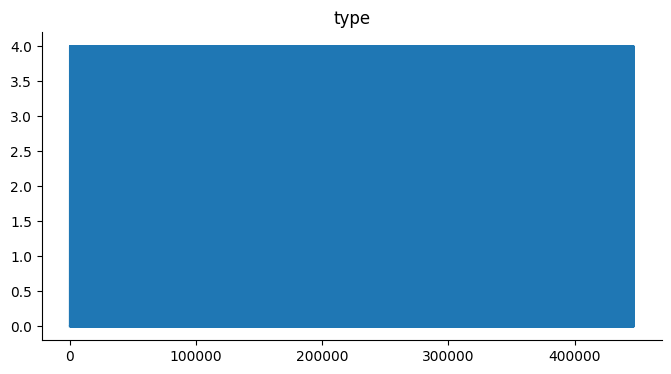

In [26]:
from matplotlib import pyplot as plt
Y['type'].plot(kind='line', figsize=(8, 4), title='type')
plt.gca().spines[['top', 'right']].set_visible(False)
plt.show()

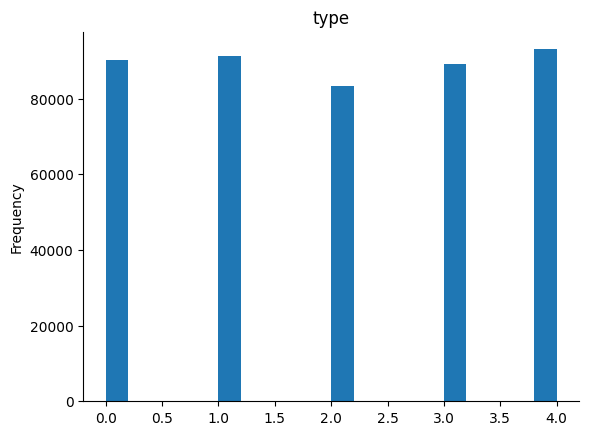

In [27]:
from matplotlib import pyplot as plt
Y['type'].plot(kind='hist', bins=20, title='type')
plt.gca().spines[['top', 'right',]].set_visible(False)
plt.show()

In [29]:
# create model
model = Sequential()
model.add(Dense(6, input_dim=6, activation='relu'))
model.add(Dense(20, activation='relu'))
model.add(Dense(20, activation='relu'))
model.add(Dense(5, activation='softmax'))

In [43]:
import keras.backend as K

def sensitivity(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    # possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    possible_negatives = K.sum(K.round(K.clip(1 - y_true, 0, 1)))
    return true_positives / (possible_negatives + true_positives)

def specificity(y_true, y_pred):
    true_negatives = K.sum(K.round(K.clip((1 - y_true) * (1 - y_pred), 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    # possible_negatives = K.sum(K.round(K.clip(1 - y_true, 0, 1)))
    return true_negatives / (possible_positives + true_negatives)


In [47]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=[sensitivity, specificity, 'accuracy'])

In [48]:
# # Compile model
# from keras.optimizers import Adamax 
# # my_optimizer = Adamax(lr=0.002, beta_1=0.9, beta_2=0.999)
# model.compile(loss='sparse_categorical_crossentropy', optimizer= 'adam', metrics=['accuracy'])
# Fit the model
model.fit(X_train, y_train, epochs=2, batch_size=10,validation_data=(X_val, y_val))
# evaluate the model


Epoch 1/2
35738/35738 [==============================] - 106s 3ms/step - loss: 0.3694 - sensitivity: 0.8115 - specificity: 0.4554 - accuracy: 0.8742 - val_loss: 0.4196 - val_sensitivity: 0.8178 - val_specificity: 0.4558 - val_accuracy: 0.8583
Epoch 2/2
35738/35738 [==============================] - 91s 3ms/step - loss: 0.3720 - sensitivity: 0.8114 - specificity: 0.4555 - accuracy: 0.8737 - val_loss: 0.3511 - val_sensitivity: 0.8106 - val_specificity: 0.4564 - val_accuracy: 0.8805


In [31]:
model

In [32]:
scores = model.evaluate(X_train, y_train)
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))


11168/11168 [==============================] - 20s 2ms/step - loss: 0.3718 - accuracy: 0.8637

accuracy: 86.37%


In [33]:
# Save model
# model.save('model1_ECG.h5')

file_path = os.path.join(ROOT_DIR, '0.86_model5_ECG_6_20_20_5.h5')
model.save(file_path)

c:\Users\vinit\Desktop\Neuromorphic_ASIC_Design\env1\lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [43]:
# from google.colab import files

# # Download the file
# files.download('model1_ECG.h5')

In [44]:
# Visualization
# from keras.layers import Dense
# from ann_visualizer.visualize import ann_viz

# ann_viz(model, title="My graph")

In [71]:
path = os.path.join(ROOT_DIR, 'database\\MIT-BIH Arrhythmia Database copy.csv') #database/INCART 2-lead Arrhythmia Database.csvdatabase/MIT-BIH Supraventricular Arrhythmia Database.csv

In [74]:
import numpy as np
from keras.models import load_model
from sklearn import metrics

# Load the trained model
file_path = os.path.join(ROOT_DIR, '0.86_model5_ECG_6_20_20_5.h5')
model = load_model(file_path)

# start_i = 
# nos = 

df = pd.read_csv(path)
X_new = pd.concat([
    df.iloc[:, 2:4],
    df.iloc[:, 9:13]
], axis=1)

Y_new = df[['type']]


# Get a section of the data from DataFrame Y
y_actual = Y_new[:]


print(X_new)
print(y_actual)
# normalize data
# from sklearn.preprocessing import MinMaxScaler
# scaler = MinMaxScaler()
# X_test_scaled = scaler.fit_transform(X_new)


# Make predictions
y_pred = model.predict(X_new)
# Print or use the predictions
print(y_pred)


predicted_class = np.argmax(y_pred, axis=1)
print(predicted_class)
print("The predicted class are :")

class_mapping = {0: 'N', 1: 'VEB', 2: 'SVEB', 3: 'F', 4: 'Q'}

# Replace the predicted integer classes with their string values
predicted_classes = [class_mapping[pred] for pred in predicted_class]

# Print the predicted classes vertically
for pred in predicted_classes:
    print(pred)

# print("Accuracy:",metrics.accuracy_score(y_val, y_pred))

# print("*** Confusion Matrix ***")
# print(metrics.confusion_matrix(y_val, y_pred))

        0_pre-RR  0_post-RR  0_qrs_interval  0_pq_interval  0_qt_interval  \
0             76      313.0              41             18             66   
1            313      315.0              21              4             33   
2            315      321.0              22              3             32   
3            321      336.0              22              4             33   
4            336      344.0              11              4             16   
...          ...        ...             ...            ...            ...   
100684       240      241.0              14              3             18   
100685       241      243.0              13              5             19   
100686       243      252.0              38             21             67   
100687       252      244.0              27              5             40   
100688       244      236.0              28             21             50   

        0_st_interval  
0                   7  
1                   8  
2  

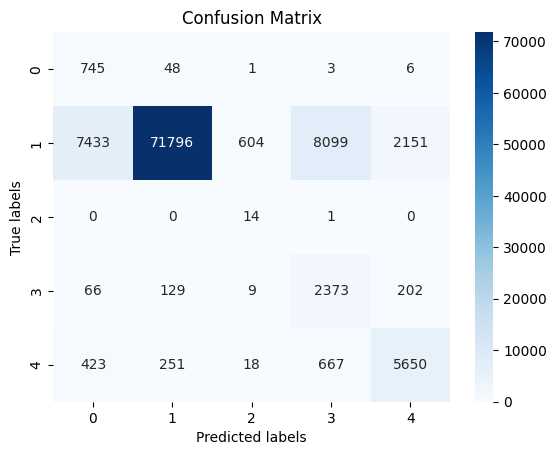

In [75]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

y_true = y_actual  # True labels for the test data
y_pred = predicted_classes  # Predicted labels by the model

# Compute confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred)

# Visualize confusion matrix using heatmap
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()